<a href="https://colab.research.google.com/github/zahidamin/SmartcityLab/blob/main/Copy_of_ch5_nb1_yolo_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="border: 1px solid #e7692c; border-left: 15px solid #e7692c; padding: 10px; text-align:justify;">
    <strong style="color: #e7692c">Tip.</strong> <a style="color: #000000;" href="https://nbviewer.jupyter.org/github/PacktPublishing/Hands-On-Computer-Vision-with-TensorFlow-2/blob/master/Chapter05/ch5_nb1_yolo_inference.ipynb" title="View with Jupyter Online">Click here to view this notebook on <code>nbviewer.jupyter.org</code></a>. 
    <br/>These notebooks are better read there, as Github default viewer ignores some of the formatting and interactive content.
    </p>

<table style="font-size: 1em; padding: 0; margin: 0;">
    <tr style="vertical-align: top; padding: 0; margin: 0;background-color: #ffffff">
        <td style="vertical-align: top; padding: 0; margin: 0; padding-right: 15px;">
    <p style="background: #363636; color:#ffffff; text-align:justify; padding: 10px 25px;">
        <strong style="font-size: 1.0em;"><span style="font-size: 1.2em;"><span style="color: #e7692c;">Hands-on</span> Computer Vision with TensorFlow 2</span><br/>by <em>Eliot Andres</em> & <em>Benjamin Planche</em> (Packt Pub.)</strong><br/><br/>
        <strong>> Chapter 5: Object Detection Models</strong><br/>
    </p>

<h1 style="width: 100%; text-align: left; padding: 0px 25px;"><small style="color: #e7692c;">Notebook 1:</small><br/>Inference with YOLO</h1>
<br/>
<p style="border-left: 15px solid #363636; text-align:justify; padding: 0 10px;">
    We introduced the inner workings of You Only Look Once (YOLO), a fast object detection model.
    <br/>In this first notebook, we will use the model for inference.
</p>
<br/>
<p style="border-left: 15px solid #363636; text-align:justify; padding: 0 10px;">
    <strong> Requirements </strong>
<br/><br/>
    To run this notebook, download the YOLO V3 weights and convert them using the command:
<pre>
wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights
<br>
python convert.py --weights weights/yolov3.weights --output weights/yolov3.tf
</pre>
</p>
<p style="border-left: 15px solid #363636; text-align:justify; padding: 0 10px;">
    <strong> Acknowledgements </strong><br/><br/>
    This implementation is based on Zihao Zhang's <a href="https://github.com/zzh8829/yolov3-tf2">implementation</a>. Thanks to him!

</p>
<p style="border-left: 15px solid #e7692c; padding: 0 10px; text-align:justify;">
    <strong style="color: #e7692c;">Tip.</strong> The notebooks shared on this git repository illustrate some notions from the book "<em><strong>Hands-on Computer Vision with TensorFlow 2</strong></em>" written by Eliot Andres and Benjamin Planche, published by Packt. If you enjoyed the insights shared here, <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Learn more about the book!"><strong>please consider acquiring the book!</strong></a>
<br/><br/>
The book provides further guidance for those eager to learn about computer vision and to harness the power of TensorFlow 2 and Keras to build efficient recognition systems for object detection, segmentation, video processing, smartphone applications, and more.</p>
        </td>
        <td style="vertical-align: top; padding: 0; margin: 0; width: 280px;">
    <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Learn more about the book!" target="_blank">
        <img src="../banner_images/book_cover.png" width=280>
    </a>
    <p style="background: #e7692c; color:#ffffff; padding: 10px; text-align:justify;"><strong>Leverage deep learning to create powerful image processing apps with TensorFlow 2 and Keras. <br/></strong>Get the book for more insights!</p>
    <ul style="height: 32px; white-space: nowrap; text-align: center; margin: 0px; padding: 0px; padding-top: 10px;">
    <li style="display: block;height: 100%;float: left;vertical-align: middle;margin: 0 25px 10px;padding: 0px;">
        <a href="https://www.amazon.com/Hands-Computer-Vision-TensorFlow-processing/dp/1788830644" title="Get the book on Amazon (paperback or Kindle version)!" target="_blank">
        <img style="vertical-align: middle; max-width: 72px; max-height: 32px;" src="../banner_images/logo_amazon.png" width="75px">
        </a>
    </li>
    <li style="display: inline-block;height: 100%;vertical-align: middle;float: right;margin: -5px 25px 10px;padding: 0px;">
        <a href="https://www.packtpub.com/application-development/hands-computer-vision-tensorflow-2" title="Get your Packt book (paperback, PDF, ePUB, or MOBI version)!" target="_blank">
        <img style="vertical-align: middle; max-width: 72px; max-height: 32px;" src="../banner_images/logo_packt.png" width="75px">
        </a>
    </li>
    </ul>
        </td>
        </tr>
        </table>

In [ ]:
!pip install tensorflow

In [28]:
!wget https://pjreddie.com/media/files/yolov3.weights -O weights/yolov3.weights


!python convert.py --weights weights/yolov3.weights --output weights/yolov3.pb

--2022-02-27 09:54:09--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘weights/yolov3.weights’

weights/yolov3.weig 100%[===================>] 236.52M  71.2MB/s    in 3.5s    

2022-02-27 09:54:13 (67.1 MB/s) - ‘weights/yolov3.weights’ saved [248007048/248007048]

2022-02-27 09:54:16.745993: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "yolov3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                 

## Imports

In [27]:
!python convert.py --weights /content/weights/yolov3.weights --output /yolov3.tf


2022-02-27 09:47:17.809052: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Model: "yolov3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 yolo_darknet (Functional)      ((None, None, None,  40620640    ['input_1[0][0]']                
                                 256),                                                            
                                 (None, None, None,                                               
                              

In [30]:
import time
from absl import app, flags, logging
from absl.flags import FLAGS
import cv2
import numpy as np
import tensorflow as tf
from models import YoloV3
from utils import draw_outputs, transform_images
import matplotlib.pyplot as plt

CLASSES_PATH = './coco.names'
WEIGHTS_PATH = '/content/weights/yolov3.pb'
IMAGE_SIZE = 416

## Load the model, the classes and the example image

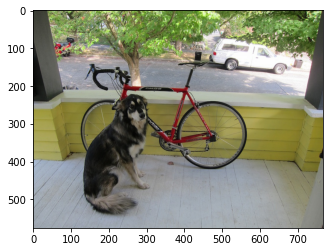

In [31]:
yolo = YoloV3()
# yolo.load_weights('/content/weights/yolov3.tf')
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('./dog_example.jpg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

## Run inference and display result

	dog, 0.9977410435676575, [0.15920368 0.38621816 0.41723308 0.9451945 ]
	bicycle, 0.9901672005653381, [0.1532267 0.2177043 0.7412542 0.7511742]
	truck, 0.9378405213356018, [0.6156051  0.15119573 0.90188897 0.2891039 ]


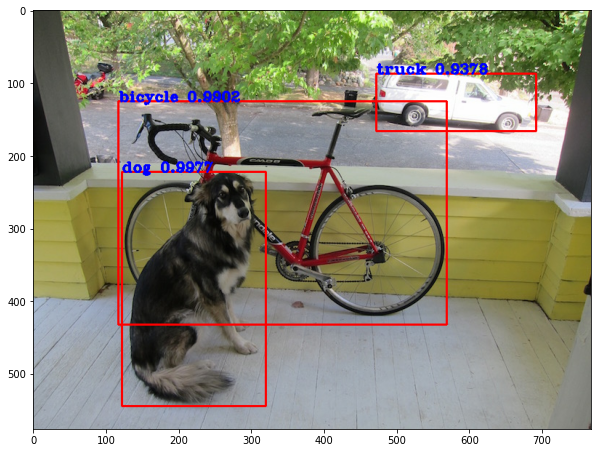

In [32]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 20))
plt.imshow(prediction_img)

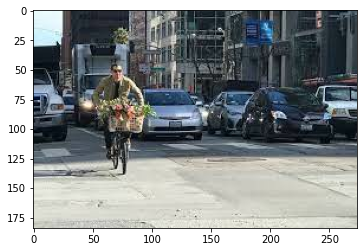

In [39]:
olo = YoloV3()
yolo.load_weights(WEIGHTS_PATH)
class_names = [c.strip() for c in open(CLASSES_PATH).readlines()]

img = tf.image.decode_image(open('/content/objDetectyolo.jpeg', 'rb').read(), channels=3)
plt.imshow(img)
plt.show()

input_img = tf.expand_dims(img, 0)
input_img = transform_images(input_img, IMAGE_SIZE)

	car, 0.9986905455589294, [0.32690787 0.35234767 0.5356238  0.60636526]
	car, 0.9872786402702332, [0.5341773  0.3687009  0.67374444 0.57810104]
	car, 0.9322433471679688, [0.6368338  0.34524167 0.9305998  0.61627555]
	person, 0.9114562273025513, [0.19080955 0.22670594 0.33216155 0.7306262 ]
	car, 0.7574062347412109, [0.00126354 0.35710707 0.1073391  0.60340065]
	car, 0.6956385374069214, [0.87137306 0.35180676 0.9976752  0.5880994 ]
	bicycle, 0.6201562285423279, [0.22283961 0.5149923  0.334069   0.75771934]
	truck, 0.5167690515518188, [0.0010049  0.25618047 0.10387702 0.57097876]


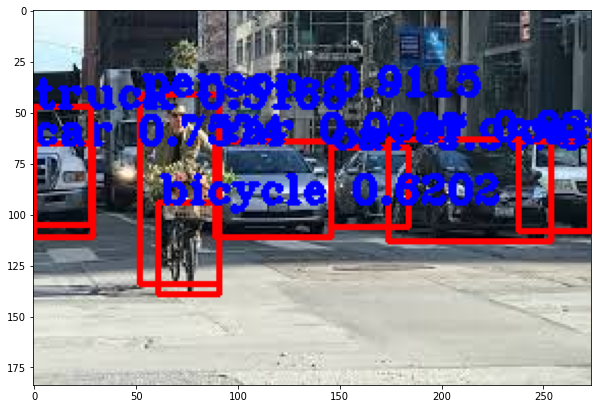

In [37]:
boxes, scores, classes, nums = yolo(input_img)


logging.info('detections:')
for i in range(nums[0]):
    print('\t{}, {}, {}'.format(class_names[int(classes[0][i])],
                                       np.array(scores[0][i]),
                                       np.array(boxes[0][i])))

prediction_img = draw_outputs(img.numpy(), (boxes, scores, classes, nums), class_names)
plt.figure(figsize=(10, 50))
plt.imshow(prediction_img)